In [77]:
# The code was removed by Watson Studio for sharing.

# Titanic Survival Model 
## Predicting the chances of survival for passengers on the Titanic using Classification

The aim of this project is to analyze the data given about passengers on the Titanic, and using the data predict the chances of survival for a particular passenger.
2 datasets are given : train.csv and test.csv
we can train our model using train.csv which has both the passenger details and if they survived or not, and then apply our model on test.csv which only has the passenger details and no information about if the passenger survived or not. 

## Loading important libraries that we may use: 

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Loading out training and testing data into a Data Frame : 

In [79]:
# The code was removed by Watson Studio for sharing.

In [80]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [81]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Exploratory Data Analysis 
We try to see how different features affect the survival rate by Data Visualization

## Cleaning the Data : 
### We try to find the features that affect Survival rate the most and clean the data accordingly to make it ready for our model

## 1. Name Vs Survival rate : 
### We try to see how the name affects the survival rate of the person

Our data set has names with prefixes like "Mr.", "Mrs.", "Miss" and so on, this will affect a person's survival rate.<br>
It is known that Females had a better chance of survival compared to males<br>
We plot a bar graph to check this :<br>

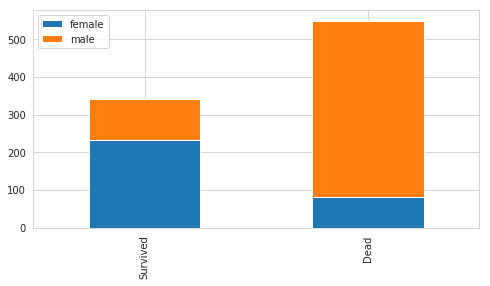

In [82]:
survived = train[train["Survived"]==1]["Sex"].value_counts()
dead = train[train["Survived"]==0]["Sex"].value_counts()
df_sex = pd.DataFrame([survived,dead])
df_sex.index = ["Survived","Dead"]
df_sex.plot(kind="bar",stacked = True, figsize = (8,4))

The chart confirms that males have a lesser chance of surviving compared to females. <br>
Prefixes like <b>"Mr."</b>, <b>"Sir."</b> would have lesser chance of survival compared to Prefixes like <b>"Miss."</b>, <b>"Mrs."</b><br>
Any other prefixes like <b>"Rev"</b> or <b>"Dr."</b> can be put into a separate category.<br>

In [83]:
combined_data = [train,test]

for data in combined_data:
    data["Prefix"] = data["Name"].str.extract(' ([A-Za-z]+)\.', expand = False)

In [84]:
train["Prefix"].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Countess      1
Jonkheer      1
Don           1
Sir           1
Mme           1
Lady          1
Capt          1
Ms            1
Name: Prefix, dtype: int64

## Mapping is defined as :
<ol>
    <li>Mr, Master as 0 
    <li>Miss, Mlle, Ms as 1 
    <li>Mrs, Mme, Lady as 2 
    <li>Others as 3 
</ol>

In [85]:
Prefix_mapping = {"Mr":0,"Miss":1,"Mrs":2,"Master":0,"Dr":3,"Rev":3,"Major":3,"Mlle":1,"Col":3,"Capt":3,"Sir":3,"Ms":1,"Lady":3,"Mme":2,"Countess":3,"Jonkheer":3,"Don":3}

In [86]:
for data in combined_data:
    data["Prefix"] = data["Prefix"].map(Prefix_mapping)

In [87]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Prefix
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [88]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Prefix
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2.0


In [89]:
test["Prefix"] = test["Prefix"].fillna(3)
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Prefix
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000,418.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188,0.576555
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576,0.822423
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200,0.000000
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000,1.000000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200,3.000000


In [90]:
for data in combined_data:
    data.drop(columns = "Name",inplace=True)

In [91]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Prefix
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [92]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Prefix
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,0.0
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,2.0
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,0.0
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,0.0
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,2.0


## 2. Cabin Vs Survival :

We first see how many null values are there in the Cabin column of our train data set : 

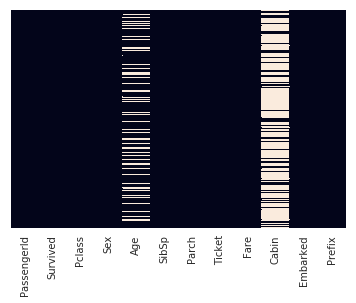

In [93]:
import seaborn as sns

sns.heatmap(train.isnull(), yticklabels = False, cbar = False)

In [94]:
train["Cabin"].isnull().value_counts()

True     687
False    204
Name: Cabin, dtype: int64

We check to see if having a Cabin number has anything to do with the survivar rate of the passenger: 

In [95]:
train["Cabin"] = train["Cabin"].fillna(0)
for i in range(891):
    if(train.at[i,"Cabin"]!=0):
        train.at[i,"Cabin"]=1
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Prefix
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,0,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,1,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,0,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,1,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,0,S,0


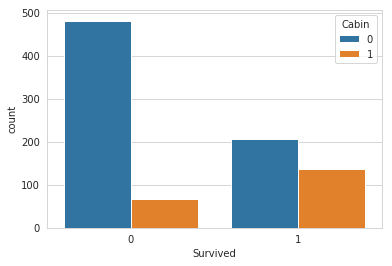

In [96]:
sns.countplot(x = "Survived", hue = "Cabin", data= train)

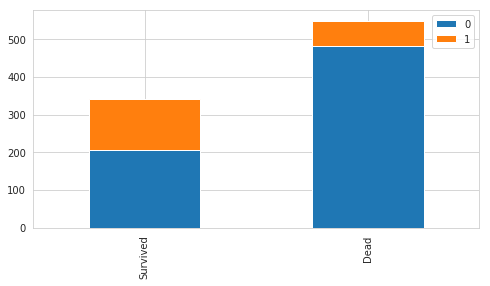

In [97]:
survived = train[train["Survived"]==1]["Cabin"].value_counts()
dead = train[train["Survived"]==0]["Cabin"].value_counts()
df_cabin = pd.DataFrame([survived,dead])
df_cabin.index = ["Survived","Dead"]
df_cabin.plot(kind="bar",stacked = True, figsize = (8,4))

We can see that Cabin has too many Null values, but most passengers that did not survive also didnt have a cabin number, we can code our data as <br>
<b>Having a Cabin : </b> 1 <br>
<b> Not Having a Cabin : </b> 0

In [98]:
test["Cabin"] = test["Cabin"].fillna(0)
for i in range(417):
    if(test.at[i,"Cabin"]!=0):
        test.at[i,"Cabin"]=1


In [99]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Prefix
0,892,3,male,34.5,0,0,330911,7.8292,0,Q,0.0
1,893,3,female,47.0,1,0,363272,7.0000,0,S,2.0
2,894,2,male,62.0,0,0,240276,9.6875,0,Q,0.0
3,895,3,male,27.0,0,0,315154,8.6625,0,S,0.0
4,896,3,female,22.0,1,1,3101298,12.2875,0,S,2.0


The <b>Cabin</b> column has been encoded.

## 3. Passenger Class Vs Survival Rate :

Let us vizualise the data to see if the class of the passenger impacts the survival rate or not:

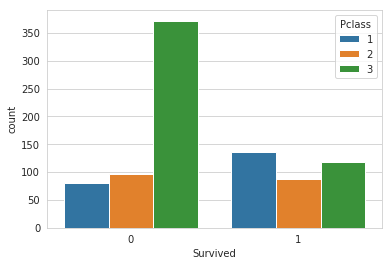

In [100]:
sns.set_style("whitegrid")
sns.countplot(x = "Survived", hue = "Pclass", data = train)

From the bar plot it is clear that the passengers from <b>First Class</b> had a higher chance of surviving. <br>
Majority of the passengers in <b>Third Class</b> did not survive. 
Therefore, Passenger Class is an important factor while predicting the survival rate of the passengers.

## 4. Age
we use data visulaization to see how age influences the survival rate of the passengers : -

We check to see if Age has any null values -

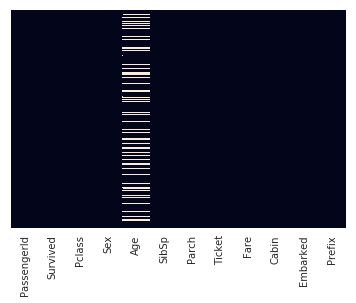

In [101]:
sns.heatmap(train.isnull(), yticklabels = False, cbar = False)

Age has a few null values which should be filled up. <br>
We can fill the null values using the average age of the passengers in each Passenger class.

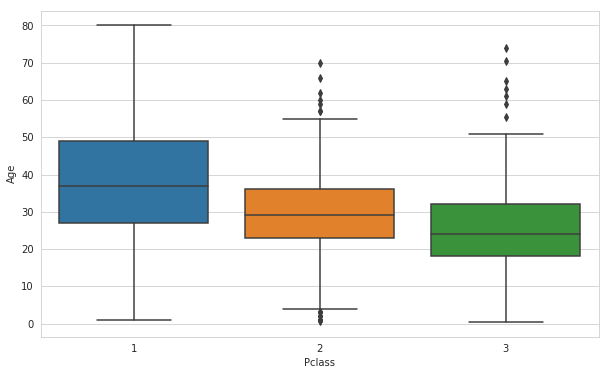

In [102]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Pclass",y="Age",data=train)

In [103]:
avg_first = train["Age"][train["Pclass"]==1].mean()
avg_second = train["Age"][train["Pclass"]==2].mean()
avg_third = train["Age"][train["Pclass"]==3].mean()
print("Average age for First class Passenger : ",avg_first)
print("Average age for Second class Passenger : ",avg_second)
print("Average age for Third class Passenger : ",avg_third)

Average age for First class Passenger :  38.233440860215055
Average age for Second class Passenger :  29.87763005780347
Average age for Third class Passenger :  25.14061971830986


In [104]:
for data in combined_data:
    data["Age"] = data["Age"].fillna(0)
    
for i in range(891):
    if(train.at[i,"Age"]==0):
        if(train.at[i,"Pclass"]==1):
            train.at[i,"Age"]=avg_first
        elif(train.at[i,"Pclass"]==2):
            train.at[i,"Age"]=avg_second
        else:
            train.at[i,"Age"]=avg_third
for i in range(418):
    if(test.at[i,"Age"]==0):
        if(test.at[i,"Pclass"]==1):
            test.at[i,"Age"]=avg_first
        elif(test.at[i,"Pclass"]==2):
            test.at[i,"Age"]=avg_second
        else:
            test.at[i,"Age"]=avg_third

In [105]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Prefix
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.292875,0.523008,0.381594,32.204208,0.567901
std,257.353842,0.486592,0.836071,13.210527,1.102743,0.806057,49.693429,0.826963
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,37.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,3.000000


In [106]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Prefix
count,418.000000,418.000000,418.000000,418.000000,418.000000,417.000000,418.000000
mean,1100.500000,2.265550,29.555296,0.447368,0.392344,35.627188,0.576555
std,120.810458,0.841838,12.846509,0.896760,0.981429,55.907576,0.822423
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,23.000000,0.000000,0.000000,7.895800,0.000000
50%,1100.500000,3.000000,25.140620,0.000000,0.000000,14.454200,0.000000
75%,1204.750000,3.000000,36.375000,1.000000,0.000000,31.500000,1.000000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200,3.000000


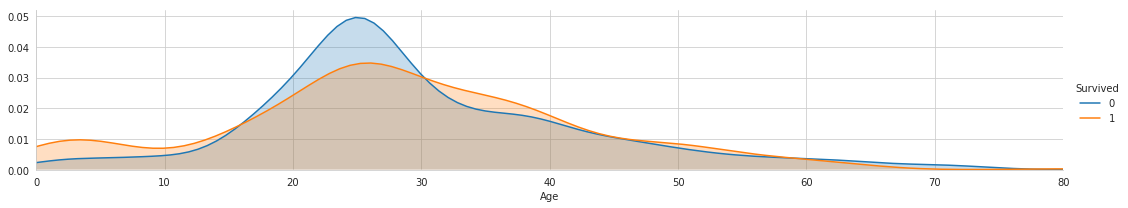

In [107]:
fac = sns.FacetGrid(train,hue = "Survived", aspect = 5)
fac.map(sns.kdeplot,'Age',shade=True)
fac.set(xlim=(0,train["Age"].max()))
fac.add_legend()


We look closely at the different age ranges: 

### Age range : 0 - 20

(0, 20)

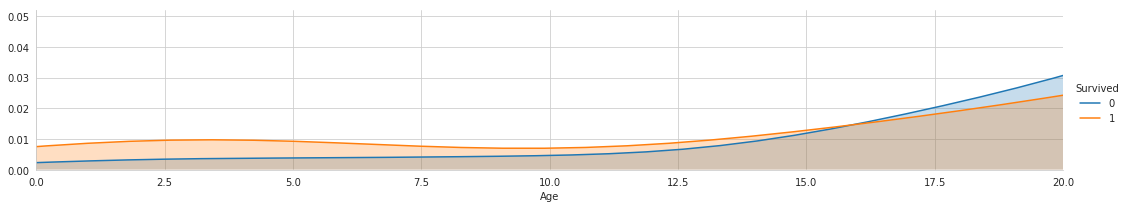

In [108]:
fac = sns.FacetGrid(train,hue = "Survived", aspect = 5)
fac.map(sns.kdeplot,'Age',shade=True)
fac.set(xlim=(0,train["Age"].max()))
fac.add_legend()
plt.xlim(0,20)

### Age range : 20 - 30

(20, 30)

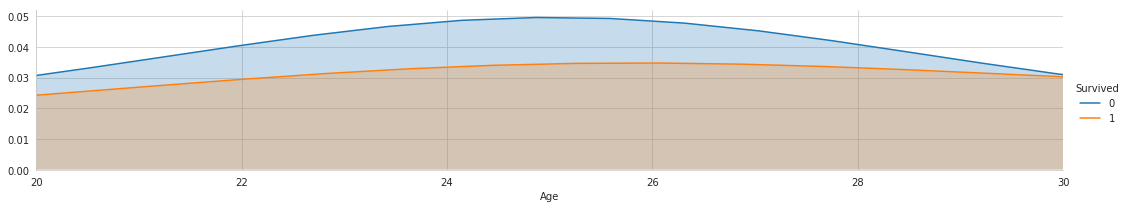

In [109]:
fac = sns.FacetGrid(train,hue = "Survived", aspect = 5)
fac.map(sns.kdeplot,'Age',shade=True)
fac.set(xlim=(0,train["Age"].max()))
fac.add_legend()
plt.xlim(20,30)

### Age range : 30 above

(30, 75)

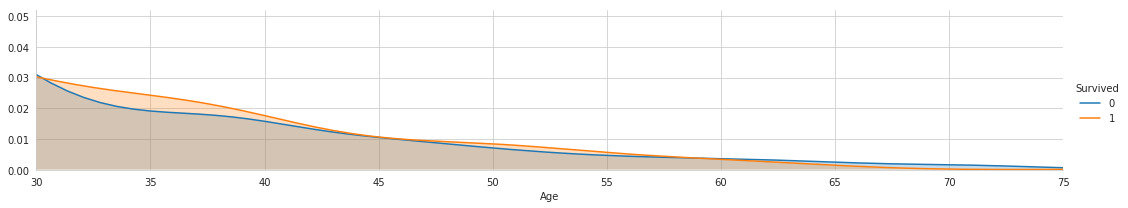

In [110]:
fac = sns.FacetGrid(train,hue = "Survived", aspect = 5)
fac.map(sns.kdeplot,'Age',shade=True)
fac.set(xlim=(0,train["Age"].max()))
fac.add_legend()
plt.xlim(30,75)

## Observation : 
1. Younger people, age 0 - 20 are more likely to survive than to die
2. People in the age group of 20 - 30 are more likely to die
3. Older people will more likely survive

In general, the young adult passengers have the highest probablity of dying compard to children and older adults

## 5. Sex v/s Survival Rate : 
We try to see if the sex of a passenger has anything to do with their survival rate.

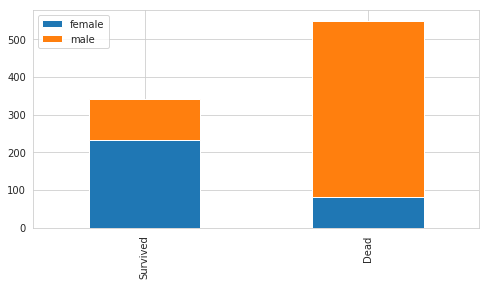

In [111]:
survived = train[train["Survived"]==1]["Sex"].value_counts()
dead = train[train["Survived"]==0]["Sex"].value_counts()
df_sex = pd.DataFrame([survived,dead])
df_sex.index = ["Survived","Dead"]
df_sex.plot(kind="bar",stacked = True, figsize = (8,4))

<b>Observation : </b> Male passengers have a higher chance of dying compared to female passengers. <br>
We can encode the data in the following way : <br>
<b> Female : </b> 1<br>
<b> Male   : </b> 0 <br>

In [112]:
dummy = pd.get_dummies(train["Sex"])
dummy.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [113]:
train["Sex"] = dummy["female"]
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Prefix
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,0,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,1,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,0,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,1,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,0,S,0


In [114]:
dummy2 = pd.get_dummies(test["Sex"])
test["Sex"] = dummy2["female"]
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Prefix
0,892,3,0,34.5,0,0,330911,7.8292,0,Q,0.0
1,893,3,1,47.0,1,0,363272,7.0000,0,S,2.0
2,894,2,0,62.0,0,0,240276,9.6875,0,Q,0.0
3,895,3,0,27.0,0,0,315154,8.6625,0,S,0.0
4,896,3,1,22.0,1,1,3101298,12.2875,0,S,2.0


## 6. Embarked V/s Survival Rate

The <b>Embarked</b> column has 3 categorical values. To use this column for data analysis, we will have to encode them. We can create 2 additinal columns for the <b>Embarked</b> values as these two columns can depict the 3 categorical values. 

In [115]:
emb_dummies = pd.get_dummies(train["Embarked"])
emb_dummies.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [116]:
train["Q"] = emb_dummies["Q"]
train["S"] = emb_dummies["S"]
train.drop(columns="Embarked",inplace = True)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Prefix,Q,S
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,0,0,0,1
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,1,2,0,0
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,0,1,0,1
3,4,1,1,1,35.0,1,0,113803,53.1000,1,2,0,1
4,5,0,3,0,35.0,0,0,373450,8.0500,0,0,0,1


In [117]:
emb_dumm = pd.get_dummies(test["Embarked"])
test["Q"] = emb_dumm["Q"]
test["S"] = emb_dumm["S"]
test.drop(columns="Embarked",inplace = True)
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Prefix,Q,S
0,892,3,0,34.5,0,0,330911,7.8292,0,0.0,1,0
1,893,3,1,47.0,1,0,363272,7.0000,0,2.0,0,1
2,894,2,0,62.0,0,0,240276,9.6875,0,0.0,1,0
3,895,3,0,27.0,0,0,315154,8.6625,0,0.0,0,1
4,896,3,1,22.0,1,1,3101298,12.2875,0,2.0,0,1


## 7. PassengerId Vs Survival Rate :
The ID of the passenger has nothing to do with the survival rate as it is a unique value for each passenger. <br>
We drop this value.

In [118]:
train.drop(columns = "PassengerId", inplace = True)
test.drop(columns = "PassengerId", inplace = True)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Prefix,Q,S
0,0,3,0,22.0,1,0,A/5 21171,7.2500,0,0,0,1
1,1,1,1,38.0,1,0,PC 17599,71.2833,1,2,0,0
2,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,0,1,0,1
3,1,1,1,35.0,1,0,113803,53.1000,1,2,0,1
4,0,3,0,35.0,0,0,373450,8.0500,0,0,0,1


## 8. Ticket Vs Survival Rate :
The Ticket of the passenger has nothing to do with the survival rate. Ticket values will have a large number of categorical 
values which do not provide us with the right information to predict wheather a passenger survived or not.<br>
People will likely have different Ticket Numbers. <br>
We drop this value.

In [119]:
train.drop(columns = "Ticket", inplace = True)
test.drop(columns = "Ticket", inplace = True)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Prefix,Q,S
0,0,3,0,22.0,1,0,7.2500,0,0,0,1
1,1,1,1,38.0,1,0,71.2833,1,2,0,0
2,1,3,1,26.0,0,0,7.9250,0,1,0,1
3,1,1,1,35.0,1,0,53.1000,1,2,0,1
4,0,3,0,35.0,0,0,8.0500,0,0,0,1


## 9. Fare v/s Survival Rate :
We analyze the amount of money each passenger paid for their ticket and try to find if this affects the survival rate of the passenger.

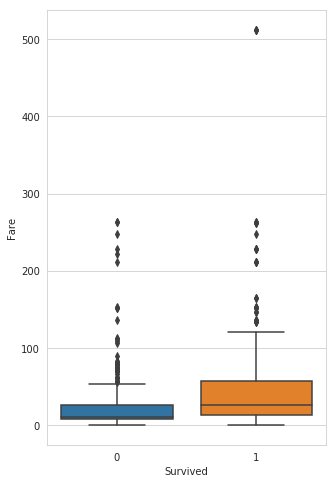

In [120]:
plt.figure(figsize=(5,8))
sns.boxplot(x="Survived",y="Fare",data=train)

### Observation :
The average money spent on the ticket was more for the passengers that survived.

In [121]:
train["Fare"].isnull().value_counts()

False    891
Name: Fare, dtype: int64

In [122]:
test["Fare"].isnull().value_counts()

False    417
True       1
Name: Fare, dtype: int64

The test dataset has one null value.<br>
We can replace this with the average fare of the people in the same passenger class.

In [123]:
fare_first = train["Fare"][train["Pclass"]==1].mean()
fare_second = train["Fare"][train["Pclass"]==2].mean()
fare_third = train["Fare"][train["Pclass"]==3].mean()
print("Average Fare for First class Passenger : ",fare_first)
print("Average Fare for Second class Passenger : ",fare_second)
print("Average Fare for Third class Passenger : ",fare_third)

Average Fare for First class Passenger :  84.15468749999992
Average Fare for Second class Passenger :  20.66218315217391
Average Fare for Third class Passenger :  13.675550101832997


In [124]:
test["Fare"] = test["Fare"].fillna(0)

for i in range(418):
    if(test.at[i,"Fare"]==0):
        if(test.at[i,"Pclass"]==1):
            test.at[i,"Fare"]=fare_first
        elif(test.at[i,"Pclass"]==2):
            test.at[i,"Fare"]=fare_second
        else:
            test.at[i,"Fare"]=fare_third
            
test["Fare"].isnull().value_counts()

False    418
Name: Fare, dtype: int64

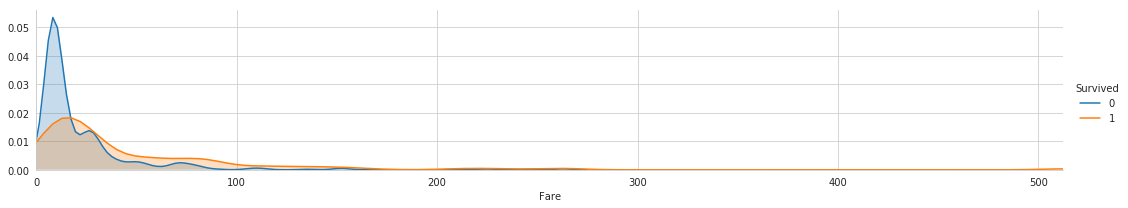

In [125]:
fac = sns.FacetGrid(train,hue = "Survived", aspect = 5)
fac.map(sns.kdeplot,'Fare',shade=True)
fac.set(xlim=(0,train["Fare"].max()))
fac.add_legend()


(0, 100)

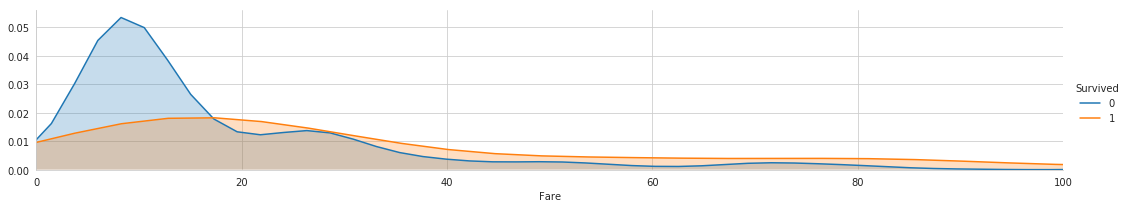

In [126]:
fac = sns.FacetGrid(train,hue = "Survived", aspect = 5)
fac.map(sns.kdeplot,'Fare',shade=True)
fac.set(xlim=(0,train["Fare"].max()))
fac.add_legend()
plt.xlim(0,100)

People who paid a lower fare were most likely from Second or Third class and therefore had a lesser chance of surviving.

## 10. SibSp and Parch V/s Survival Rate :
We first add the values of SibSp and Parch as both represent the same thing, i.e. family size: 

In [127]:
train["Family"] = train["SibSp"] + train["Parch"]
test["Family"] = test["SibSp"] + test["Parch"]

for data in combined_data:
    data.drop(columns = ["SibSp","Parch"],inplace =True)
    
train.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Prefix,Q,S,Family
0,0,3,0,22.0,7.2500,0,0,0,1,1
1,1,1,1,38.0,71.2833,1,2,0,0,1
2,1,3,1,26.0,7.9250,0,1,0,1,0
3,1,1,1,35.0,53.1000,1,2,0,1,1
4,0,3,0,35.0,8.0500,0,0,0,1,0


In [128]:
test.head()

,Pclass,Sex,Age,Fare,Cabin,Prefix,Q,S,Family
0,3,0,34.5,7.8292,0,0.0,1,0,0
1,3,1,47.0,7.0000,0,2.0,0,1,1
2,2,0,62.0,9.6875,0,0.0,1,0,0
3,3,0,27.0,8.6625,0,0.0,0,1,0
4,3,1,22.0,12.2875,0,2.0,0,1,2


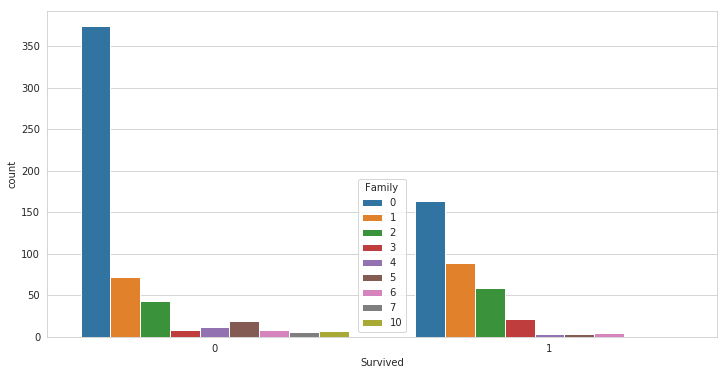

In [129]:
plt.figure(figsize = (12,6))
sns.set_style("whitegrid")
sns.countplot(x = "Survived", hue = "Family", data = train)

### Observation : 
People whoe were travelling with someone had more chnaces to survive compared to those who were travelling alone.

# Feature Scaling and Train - Test - Split
Before we make our model using various algorithms, we should scale the data. 

In [130]:
X = np.asanyarray(train[["Pclass","Sex","Age","Fare","Cabin","Prefix","Q","S","Family"]])
Y = np.asanyarray(train["Survived"])
X_TEST = np.asanyarray(test[["Pclass","Sex","Age","Fare","Cabin","Prefix","Q","S","Family"]])

In [131]:
print(X)

[[3 0 22.0 ... 0 1 1]
 [1 1 38.0 ... 0 0 1]
 [3 1 26.0 ... 0 1 0]
 ...
 [3 1 25.14061971830986 ... 0 1 3]
 [1 0 26.0 ... 0 0 0]
 [3 0 32.0 ... 1 0 0]]


In [132]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X_TEST =  sc.transform(X_TEST)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [133]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2, random_state=1)

# Making the Model
We now test various machine learning algorithms for classification of our data

## 1. K - Nearest Neighbor Algorithm

In [134]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

acc = []

for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    yhat = knn.predict(X_test)
    acc.append(accuracy_score(y_test,yhat))
    print("For k = ",i," : ",accuracy_score(y_test,yhat))


For k =  1  :  0.7206703910614525
For k =  2  :  0.7486033519553073
For k =  3  :  0.776536312849162
For k =  4  :  0.7597765363128491
For k =  5  :  0.7430167597765364
For k =  6  :  0.7374301675977654
For k =  7  :  0.7541899441340782
For k =  8  :  0.776536312849162
For k =  9  :  0.7932960893854749
For k =  10  :  0.776536312849162
For k =  11  :  0.7821229050279329
For k =  12  :  0.7877094972067039
For k =  13  :  0.7877094972067039
For k =  14  :  0.7877094972067039
For k =  15  :  0.7877094972067039
For k =  16  :  0.770949720670391
For k =  17  :  0.7821229050279329
For k =  18  :  0.770949720670391
For k =  19  :  0.770949720670391


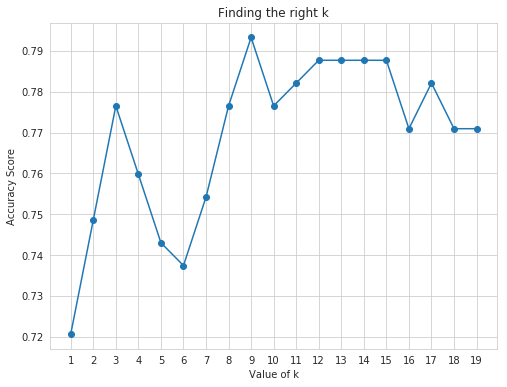

In [135]:
plt.figure(figsize=(8,6))
plt.plot(range(1,20),acc, marker = "o")
plt.xlabel("Value of k")
plt.ylabel("Accuracy Score")
plt.title("Finding the right k")
plt.xticks(range(1,20))
plt.show()

Our preferred value for k that gives us the highest accuracy is <b>k = 9</b> 

In [136]:
KNN = KNeighborsClassifier(n_neighbors = 9)
KNN.fit(X,Y)
y_pred = KNN.predict(X_TEST)

In [137]:
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [138]:
df_KNN = pd.DataFrame()
df_KNN["PassengerId"] = test2["PassengerId"]
df_KNN["Survived"] = y_pred
df_KNN.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [139]:
project.save_data(data=df_KNN.to_csv(index=False),file_name='KNN.csv',overwrite=True)

{'file_name': 'KNN.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'titanicsurvival-donotdelete-pr-awcpu1r9nxsyhj',
 'asset_id': '2079b3a6-82c4-42a9-8530-ac63968453a2'}

## Results: 
We submit our predictions for this model on kaggle for the <b>Titanic: Machine Learning from Disaster</b> Kaggle Competition and check our accuracy

Our accuracy is <b>77.27%</b>

In [140]:
KNN_accuracy = 0.77272

## 2. Decision Tree Algorithm
We try out the Decision Tree algorithm for this classification problem.

In [141]:
from sklearn.tree import DecisionTreeClassifier

depth = [];

for i in range(1,8):
    clf_tree = DecisionTreeClassifier(criterion="entropy", random_state = 100, max_depth = i)
    clf_tree.fit(X_train,y_train)
    yhat = clf_tree.predict(X_test)
    depth.append(accuracy_score(y_test,yhat))
    print("For max depth = ",i, " : ",accuracy_score(y_test,yhat))

For max depth =  1  :  0.776536312849162
For max depth =  2  :  0.7206703910614525
For max depth =  3  :  0.8044692737430168
For max depth =  4  :  0.7877094972067039
For max depth =  5  :  0.7653631284916201
For max depth =  6  :  0.7653631284916201
For max depth =  7  :  0.6983240223463687


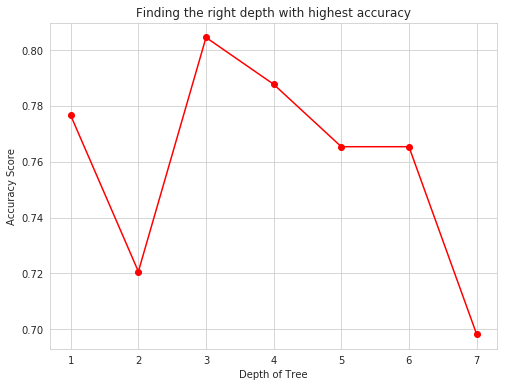

In [142]:
plt.figure(figsize=(8,6))
plt.plot(range(1,8),depth,color="red", marker = "o")
plt.xlabel("Depth of Tree")
plt.ylabel("Accuracy Score")
plt.title("Finding the right depth with highest accuracy")
plt.xticks(range(1,8))
plt.show()

Highest accuracy is obtained with depth = 3. <br>
we now train and predict with this depth.

In [143]:
clf_tr = DecisionTreeClassifier(criterion="entropy", random_state = 100, max_depth = 3)
clf_tr.fit(X,Y)
pred_tree = clf_tr.predict(X_TEST)
print(pred_tree)

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [144]:
df_TREE = pd.DataFrame()
df_TREE["PassengerId"] = test2["PassengerId"]
df_TREE["Survived"] = pred_tree
df_TREE.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [145]:
project.save_data(data=df_TREE.to_csv(index=False),file_name='TREE.csv',overwrite=True)

{'file_name': 'TREE.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'titanicsurvival-donotdelete-pr-awcpu1r9nxsyhj',
 'asset_id': '7b7afc81-a0da-463e-9d1d-75e4de6082c0'}

## Results: 
We submit our predictions for this model on kaggle for the <b>Titanic: Machine Learning from Disaster</b> Kaggle Competition and check our accuracy

Our accuracy is <b>78.46%</b>

In [146]:
TREE_accuracy = 0.78468

## 3. Random Forest Algorithm
We try out the Random Forest algorithm for this classification problem.

In [147]:
from sklearn.ensemble import RandomForestClassifier

clf_forest = RandomForestClassifier(random_state=0)
clf_forest.fit(X_train,y_train)
yhat = clf_forest.predict(X_test)
print("Accuracy for training data : ",accuracy_score(y_test,yhat))

Accuracy for training data :  0.776536312849162


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [148]:
clf_for = RandomForestClassifier(random_state=0)
clf_for.fit(X,Y)
y_forest = clf_for.predict(X_TEST)
y_forest

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [149]:
df_FOREST = pd.DataFrame()
df_FOREST["PassengerId"] = test2["PassengerId"]
df_FOREST["Survived"] = y_forest
df_FOREST.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1


In [150]:
project.save_data(data=df_FOREST.to_csv(index=False),file_name='FOREST.csv',overwrite=True)

{'file_name': 'FOREST.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'titanicsurvival-donotdelete-pr-awcpu1r9nxsyhj',
 'asset_id': '0d2704db-0349-46f5-8d8d-f1bb57292cf3'}

## Results: 
We submit our predictions for this model on kaggle for the <b>Titanic: Machine Learning from Disaster</b> Kaggle Competition and check our accuracy

Our accuracy is <b>77.27%</b>

In [151]:
FOREST_accuracy = 0.77272